In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_colwidth", 500)
%matplotlib inline

In [2]:
#Load Data
laptop = pd.read_csv('laptop_data_price_prediction.csv')
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
# Descriptive Statistics
round(laptop.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.45,5.10,2.00,4.00,8.00,8.00,64.00
Weight,1273.0,2.04,0.67,0.69,1.50,2.04,2.31,4.70
Price,1273.0,10.83,0.62,9.13,10.39,10.87,11.29,12.69
TouchScreen,1273.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00
Ips,1273.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Ppi,1273.0,146.95,42.93,90.58,127.34,141.21,157.35,352.47
HDD,1273.0,413.72,518.05,0.00,0.00,0.00,1000.00,2000.00
SSD,1273.0,186.25,186.53,0.00,0.00,256.00,256.00,1024.00


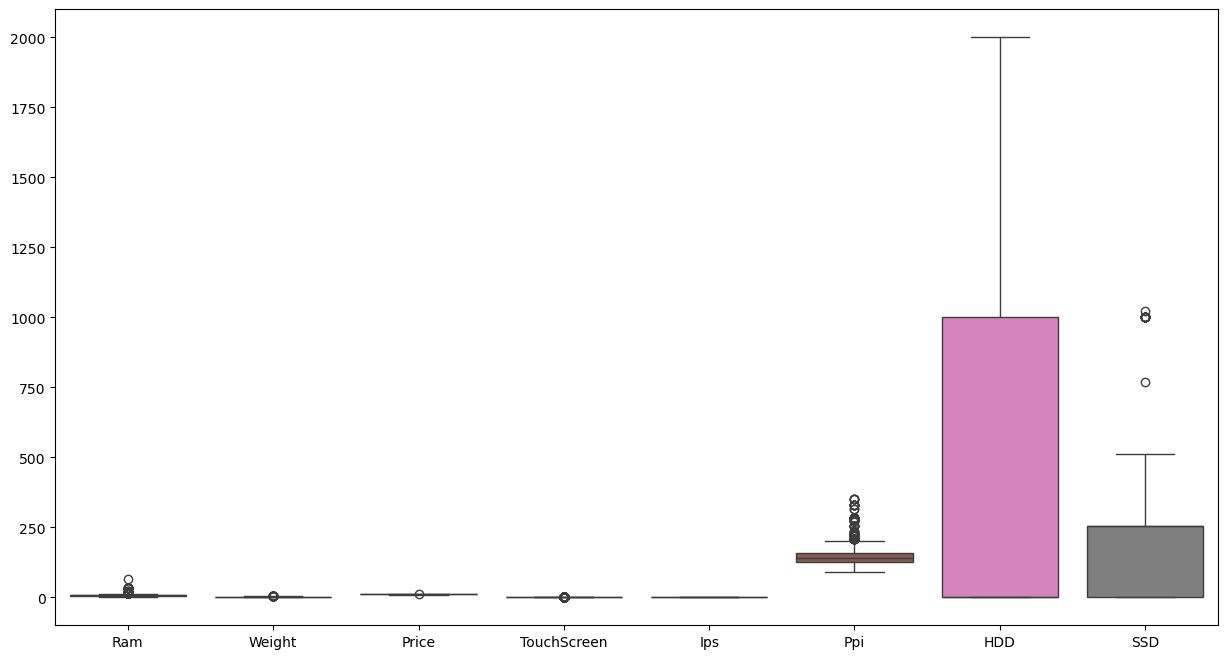

In [4]:
#Boxplot Visualization
plt.figure(figsize=(15,8))
sns.boxplot(data=laptop)
plt.show()

In [5]:
#Identify number of Classes in Gpu_brand
unique_class = {'GPU Brand':laptop['Gpu_brand'].unique(),
                'Company':laptop['Company'].unique(),
                'Type Name':laptop['TypeName'].unique(),
                'CPU Brand' :laptop['Cpu_brand'].unique(),
                'OS':laptop['Os'].unique()}
unique_df = pd.DataFrame(list(unique_class.items()), columns=['Attributes', 'Unique Value'])
unique_df

,Attributes,Unique Value
0,GPU Brand,"[Intel, AMD, Nvidia]"
1,Company,"[Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, MSI, Microsoft, Toshiba, Huawei, Xiaomi, Vero, Razer, Mediacom, Samsung, Google, Fujitsu, LG]"
2,Type Name,"[Ultrabook, Notebook, Netbook, Gaming, 2 in 1 Convertible, Workstation]"
3,CPU Brand,"[Intel Core i5, Intel Core i7, AMD Processor, Intel Core i3, Other Intel Processor]"
4,OS,"[Mac, Others, Windows]"


In [6]:
# Drop Categrical Attributes
numerical_df =laptop.drop(laptop.columns[[0,1,8,12]], axis = 1)
numerical_df.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Gpu_brand
0,8,1.37,11.175755,0,1,226.983005,0,128,Intel
1,8,1.34,10.776777,0,0,127.677940,0,0,Intel
2,8,1.86,10.329931,0,0,141.211998,0,256,Intel
3,16,1.83,11.814476,0,1,220.534624,0,512,AMD
4,8,1.37,11.473101,0,1,226.983005,0,256,Intel


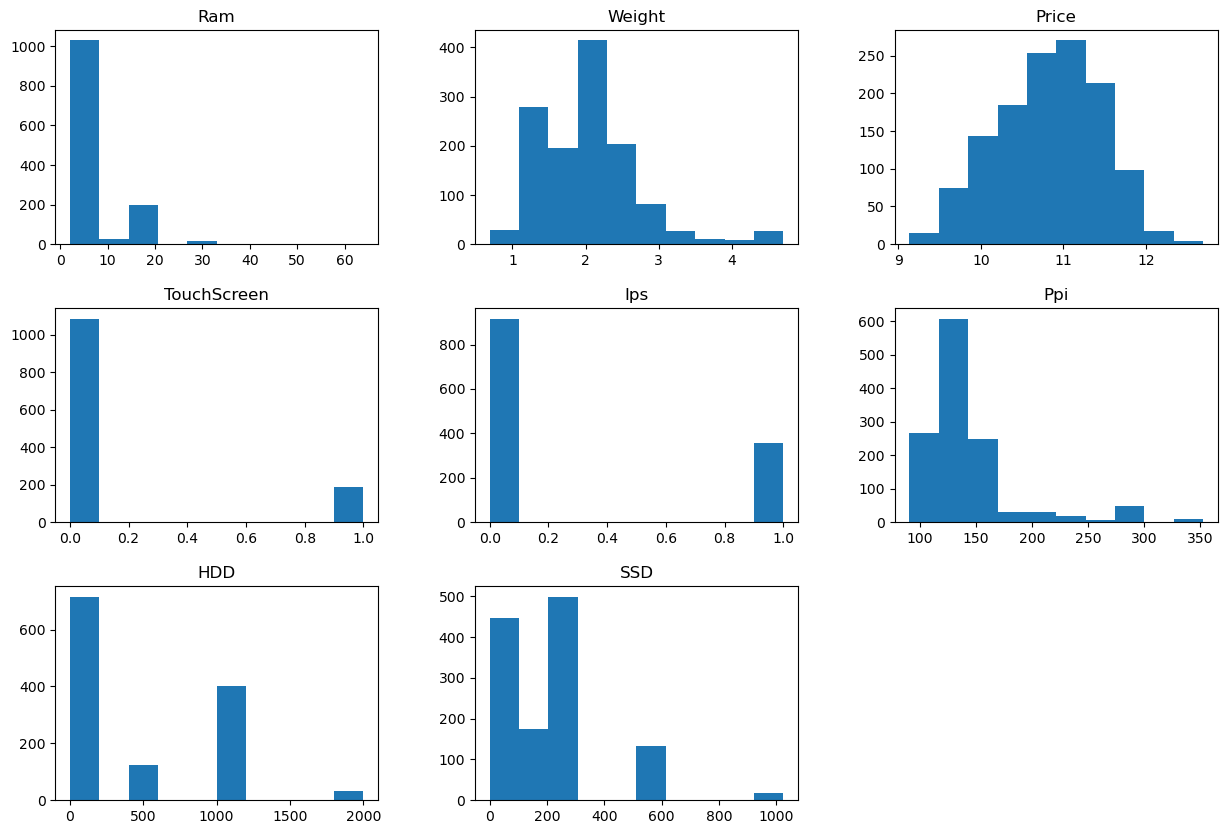

In [7]:
#Plot histograms of CUT1 variables
hist_mean=numerical_df.hist(bins=10, figsize=(15, 10),grid=False,)


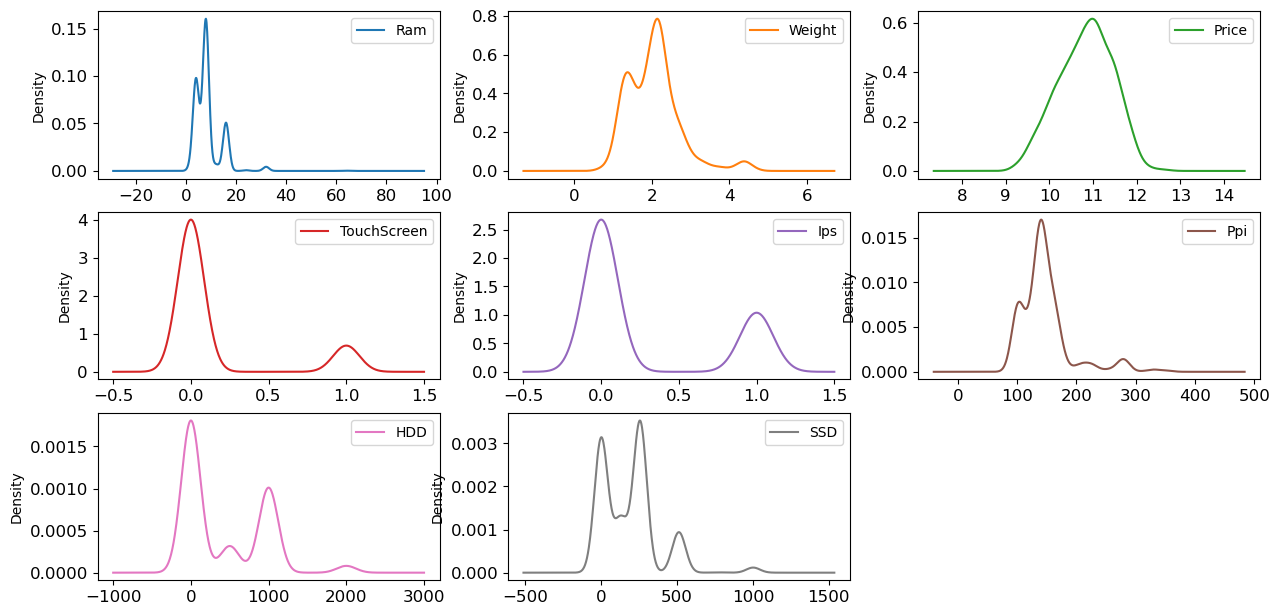

In [8]:
#Density Plots
plt = numerical_df.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

<Axes: title={'center': 'Laptop Price Feature Correlation'}>

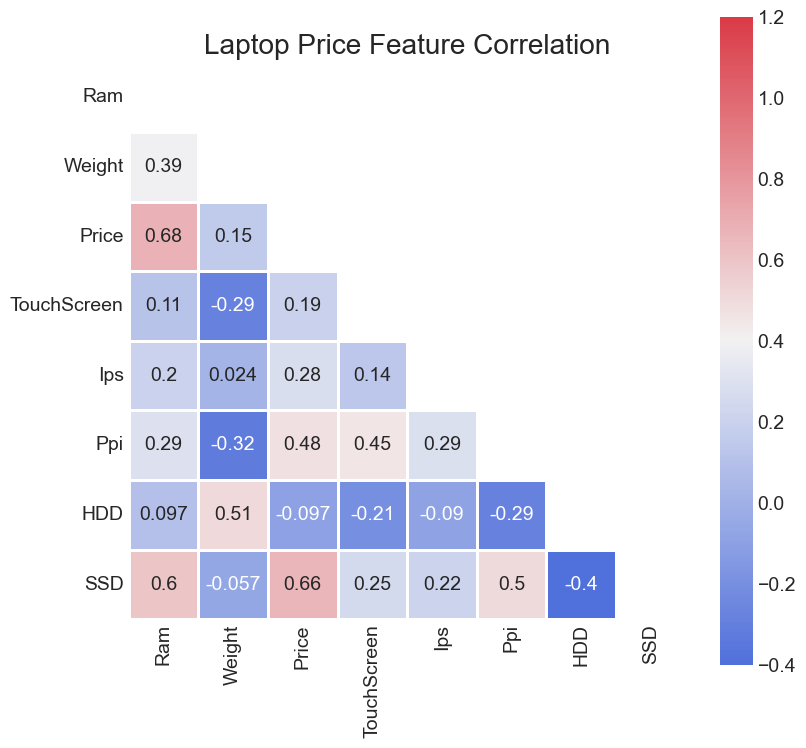

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = numerical_df.drop('Gpu_brand', axis =1)


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Laptop Price Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

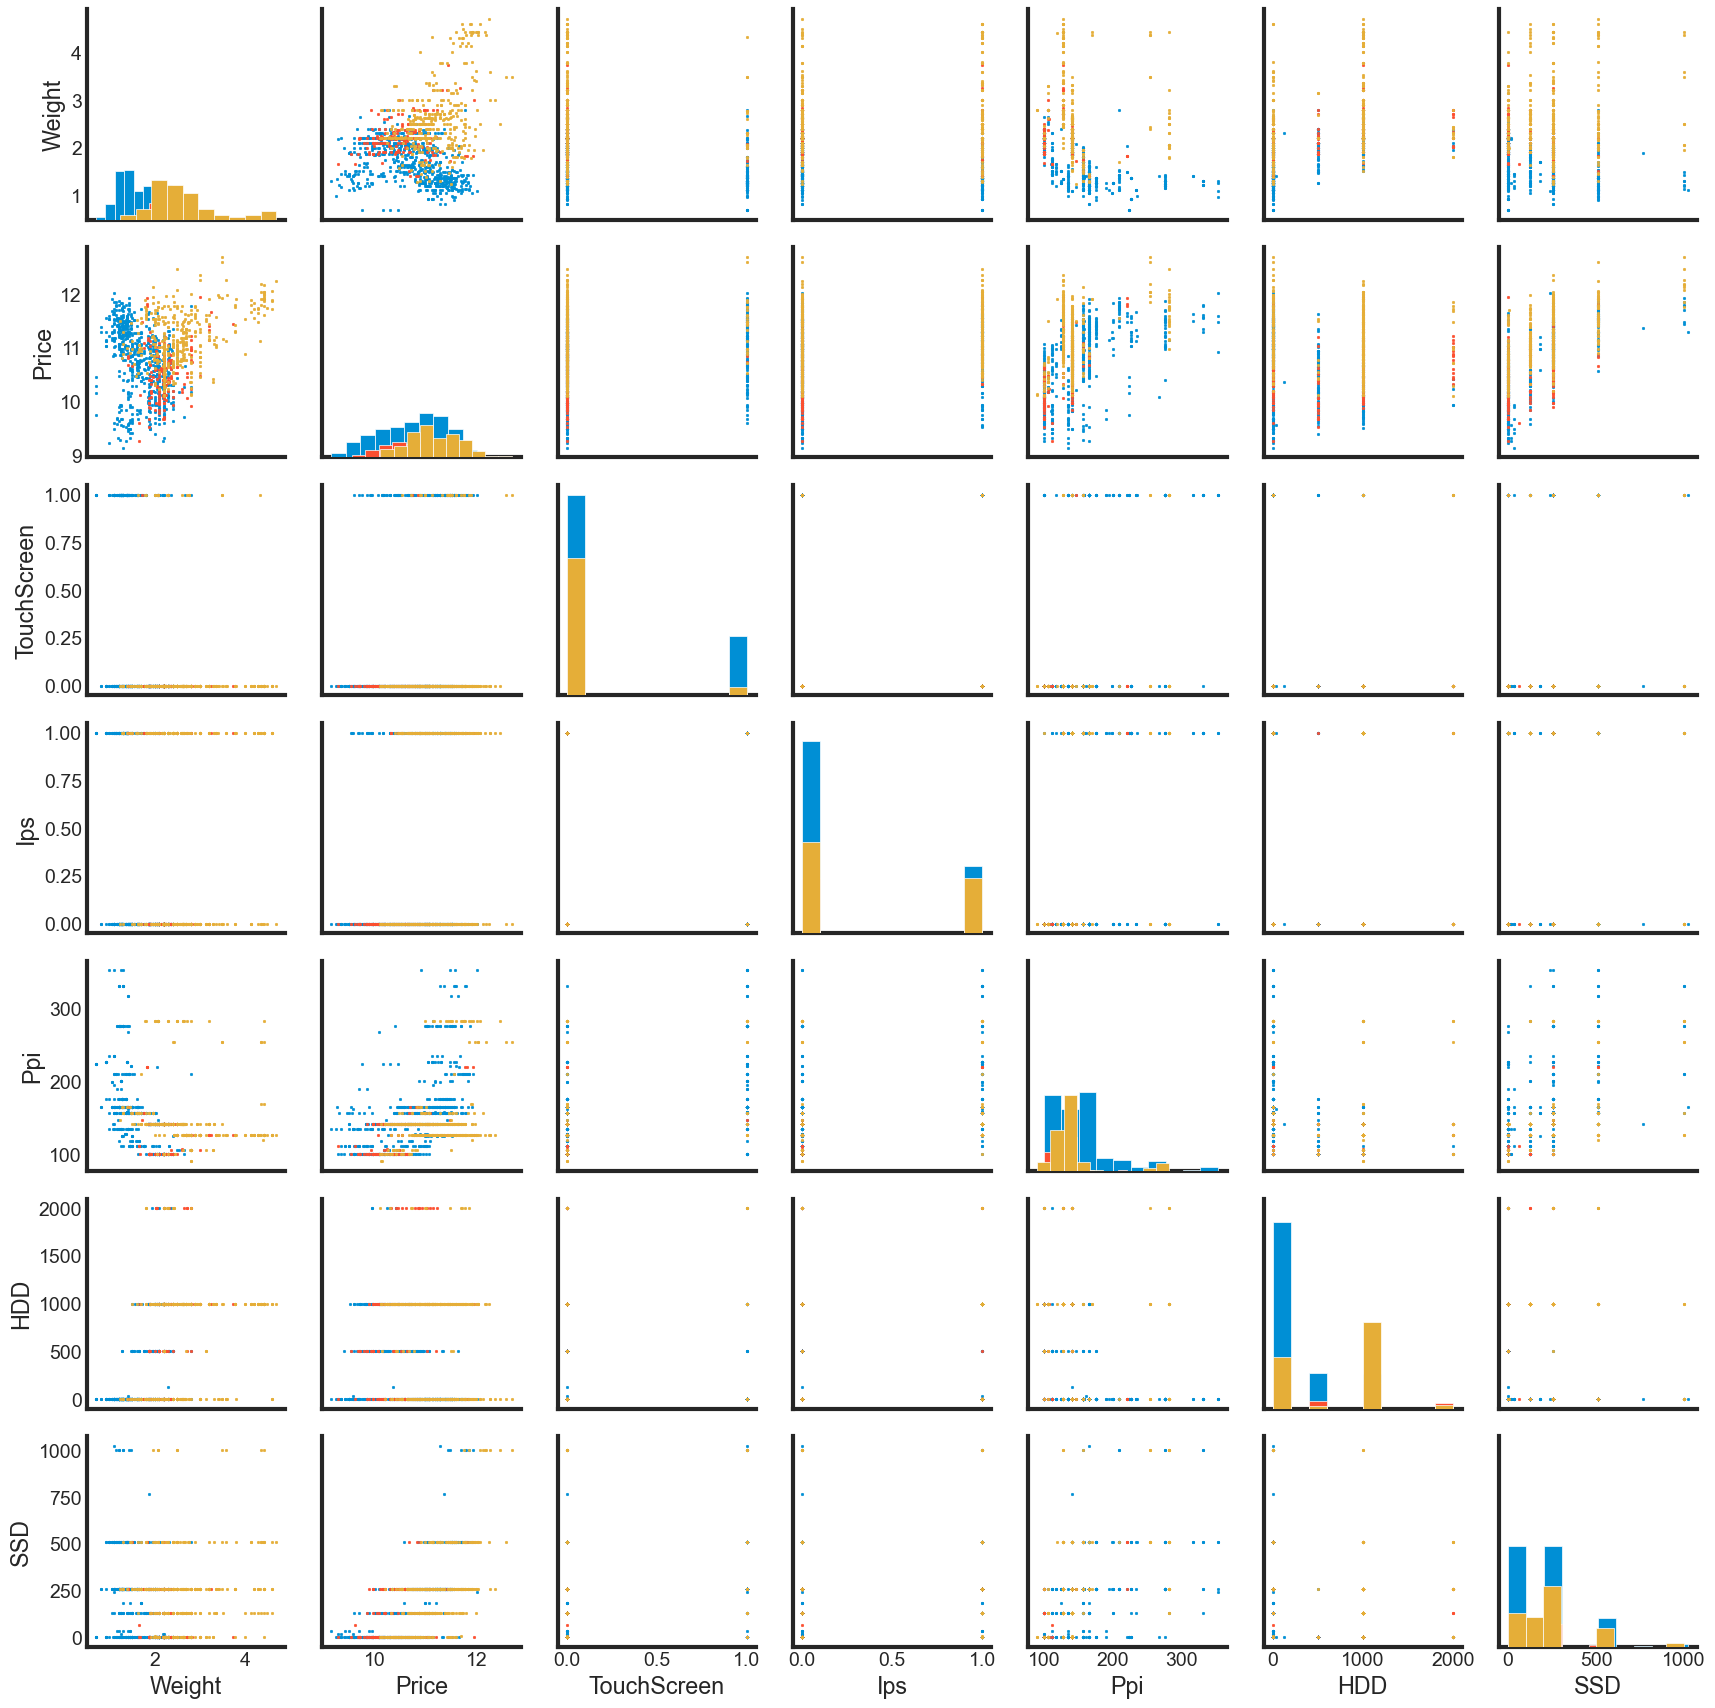

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use fivethirtyeight style for plots
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = numerical_df

# Ensure the correct columns are selected
selected_columns = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7], df.columns[8]]]

# Create the PairGrid
g = sns.PairGrid(selected_columns, hue='Gpu_brand')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=3)

plt.show()
